In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler


# from DataProduction import dataProd

import warnings
warnings.filterwarnings('ignore')

# Initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Data production and loading
run_list = [285490, 286498, 287987, 288543, 289413, 289733, 291970, 293528]
planes_list = ['UTaX', 'UTaU', 'UTbV', 'UTbX']

# dataProduction = dataProd()
# mix_ = dataProduction.multipleRun(*run_list)
# mix = mix_.copy()

import random
random.seed(46)

from scipy.special import kl_div,softmax

import os

sns.set(
    context='notebook',  # 'paper', 'notebook', 'talk', 'poster'
    style='darkgrid',   # 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
    palette='deep',      # Color palette
    font='sans-serif',   # Font family
    font_scale=0.75,      # Font scale
    rc={'figure.figsize': (12, 6)}  # Default figure size
)


def colorCodes(div_value):

    if div_value < 0.1:
        color = 'green'
    elif (div_value > 0.1) & (div_value<0.6):
        color = 'orange'
    else:
        color = 'red'
    return f'background-color: {color}'

### Simulation Data Generation.

In [2]:
class simData():

    def __init__(self,num_chips,pseudo_random):

        np.random.seed(pseudo_random)
        self.num_chips = num_chips

        chips = {}
        for i in range(self.num_chips): #One side of 1024 chips [512]
            chips[f'chip{i+1}'] = np.random.laplace(loc=0.0, scale=1.0, size=128) # For 1 Plane, 1024 ASICS, 128 Channel Each

        self.all_chips_pedestals = pd.DataFrame(chips)

        # return self.all_chips_pedestals

    def pedestals_data(self):
        return self.all_chips_pedestals

    def chip_average(self):
        self.average_pedestal_per_chip = np.mean(self.all_chips_pedestals,axis=0).values#.reshape(int(self.num_chips/16),16)

        return self.average_pedestal_per_chip 

In [3]:
num_chips = 16#Easy Visualisation

In [4]:
benchmark_data = simData(num_chips,27).chip_average()

benchmark_probability = softmax(benchmark_data)


kl_div_data=pd.DataFrame(index=np.arange(1,num_chips+1))

kl_div_data['BenchmarkScore'] = kl_div(benchmark_probability,benchmark_probability)

In [5]:
#Plots
file_path='./Misc/Plots/KLDivTests/'
os.makedirs(os.path.dirname(file_path), exist_ok=True)


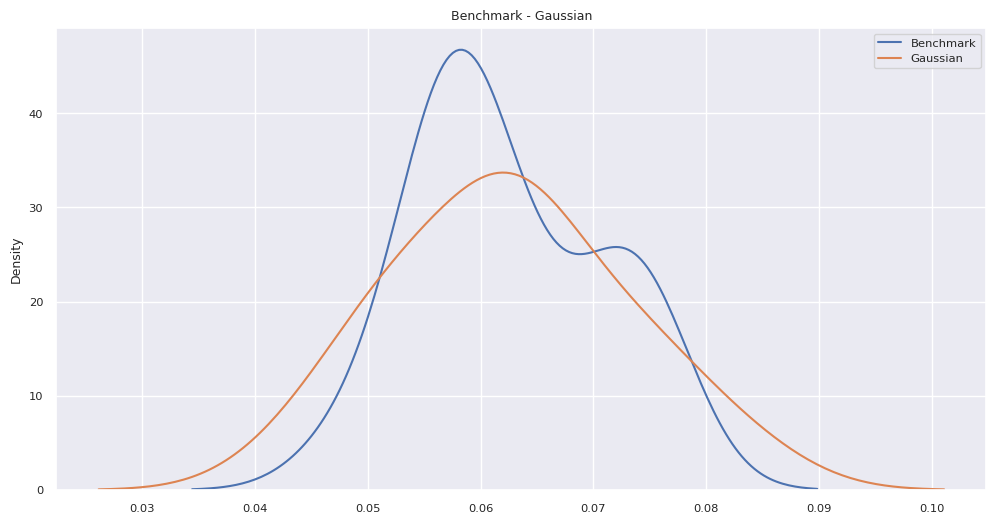

In [6]:
#KL-Divergence for Similar Distribution

test_1_laplacian = simData(num_chips,55).chip_average()

test_1_laplacian_probability = softmax(test_1_laplacian)

kl_div_data['Similar Distributions - [Test1]']  = np.round(kl_div(benchmark_probability,test_1_laplacian_probability),3)

sns.kdeplot(benchmark_probability,label='Benchmark')
sns.kdeplot(test_1_laplacian_probability,label='Gaussian')
plt.title('Benchmark - Gaussian')
plt.legend()
plt.savefig(os.path.join(file_path,"Test1_Gaussian.png"))
plt.show()

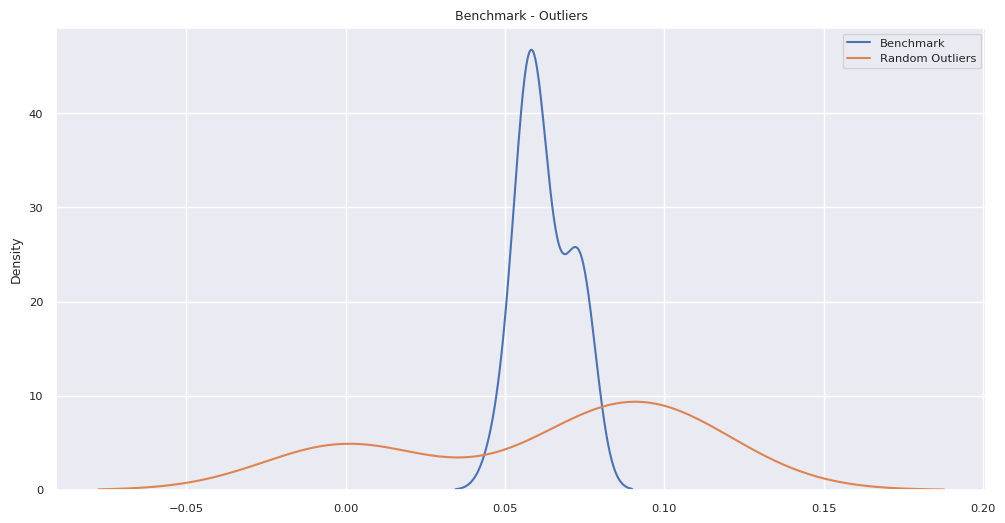

In [7]:
#KL-Divergence for Data with Random Outliers

test_2_outliers = benchmark_data.copy()

test_2_outliers[np.random.randint(num_chips,size=12)]=test_2_outliers[np.random.randint(num_chips,size=12)]+10

test_2_outliers_probability = softmax(test_2_outliers)

kl_div_data['Data with Random Outliers - [Test2]']  = np.round(kl_div(benchmark_probability,test_2_outliers_probability),3)


sns.kdeplot(benchmark_probability,label='Benchmark')
sns.kdeplot(test_2_outliers_probability,label='Random Outliers')
plt.title('Benchmark - Outliers')
plt.legend()
plt.savefig(os.path.join(file_path,"Test2_MinOutliers.png"))
plt.show()

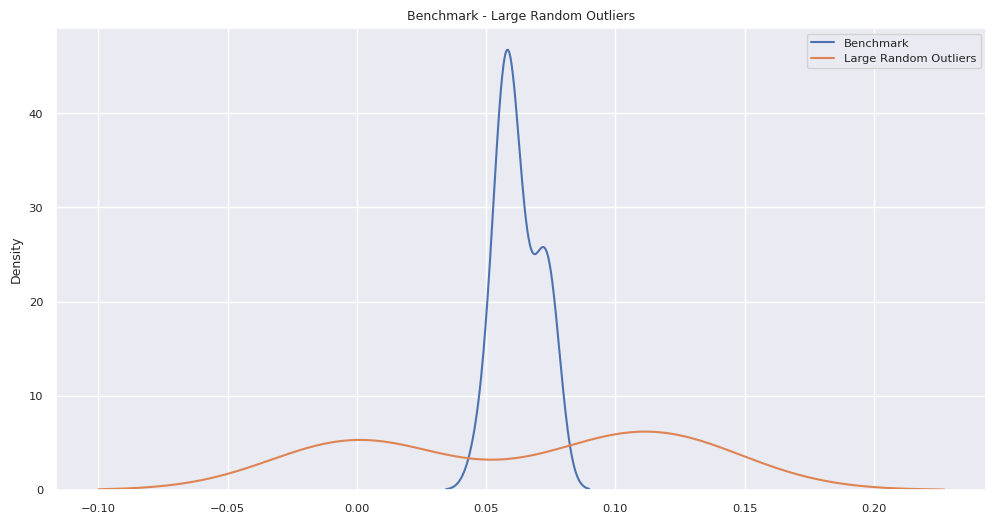

In [8]:
#KL-Divergence for Data with Large Outliers

test_3_large_outliers = benchmark_data.copy()

test_3_large_outliers[np.random.randint(num_chips,size=12)]=test_3_large_outliers[np.random.randint(num_chips,size=12)]+20

test_3_large_outliers_probability = softmax(test_3_large_outliers)

kl_div_data['Data with Large Outliers - [Test3]']  = np.round(kl_div(benchmark_probability,test_3_large_outliers_probability),3)


sns.kdeplot(benchmark_probability,label='Benchmark')
sns.kdeplot(test_3_large_outliers_probability,label='Large Random Outliers')
plt.title('Benchmark - Large Random Outliers')
plt.legend()
plt.savefig(os.path.join(file_path,"Test3_MaxOutliers.png"))
plt.show()

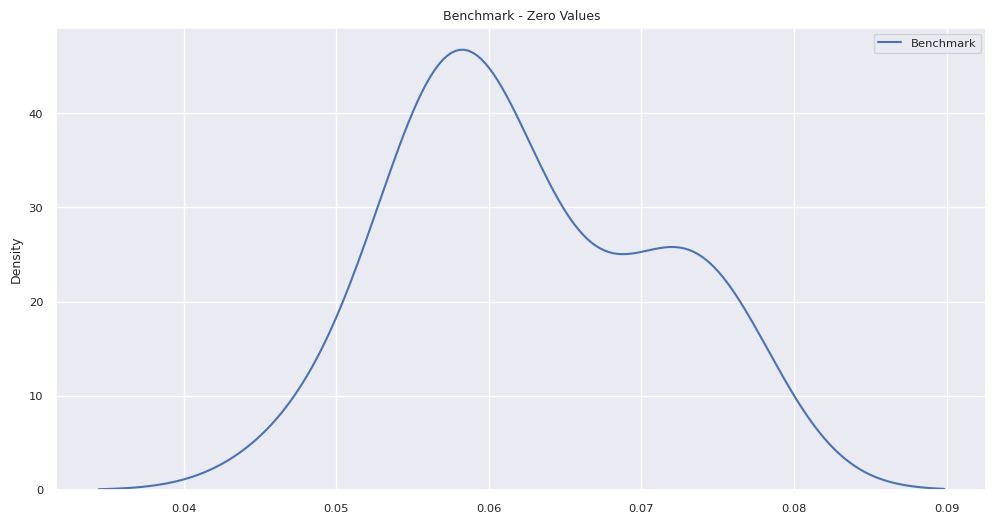

In [9]:
#KL-Divergence for Data with Zero Value Distribution

test_4_zeros = np.zeros(num_chips)

test_4_zeros_probability = softmax(test_4_zeros)

kl_div_data['Data with Zero Values - [Test4]']  = np.round(kl_div(benchmark_probability,test_4_zeros_probability),3)


sns.kdeplot(benchmark_probability,label='Benchmark')
sns.kdeplot(test_4_zeros_probability,label='Zero Value Distribution')
plt.title('Benchmark - Zero Values')
plt.legend()
plt.savefig(os.path.join(file_path,"Test4_Zeros.png"))
plt.show()

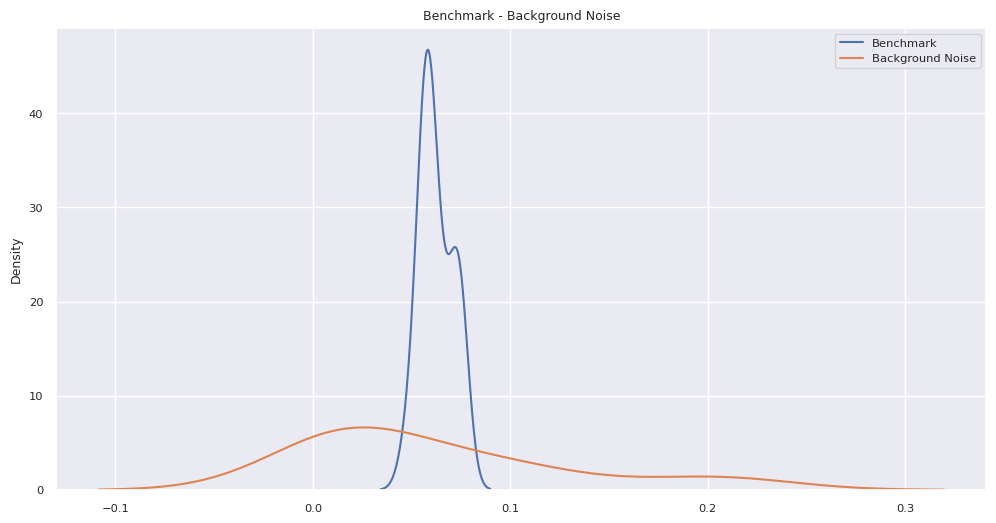

In [10]:
#KL-Divergence for Data with Background Noise

test_5_w_noise = benchmark_data.copy()

test_5_w_noise=test_5_w_noise + np.random.normal(0,1,num_chips)

test_5_w_noise_probability = softmax(test_5_w_noise)

kl_div_data['Data with Background Noise - [Test5]']  = np.round(kl_div(benchmark_probability,test_5_w_noise_probability),3)


sns.kdeplot(benchmark_probability,label='Benchmark')
sns.kdeplot(test_5_w_noise_probability,label='Background Noise')
plt.title('Benchmark - Background Noise')
plt.legend()
plt.savefig(os.path.join(file_path,"Test5_Noise.png"))
plt.show()

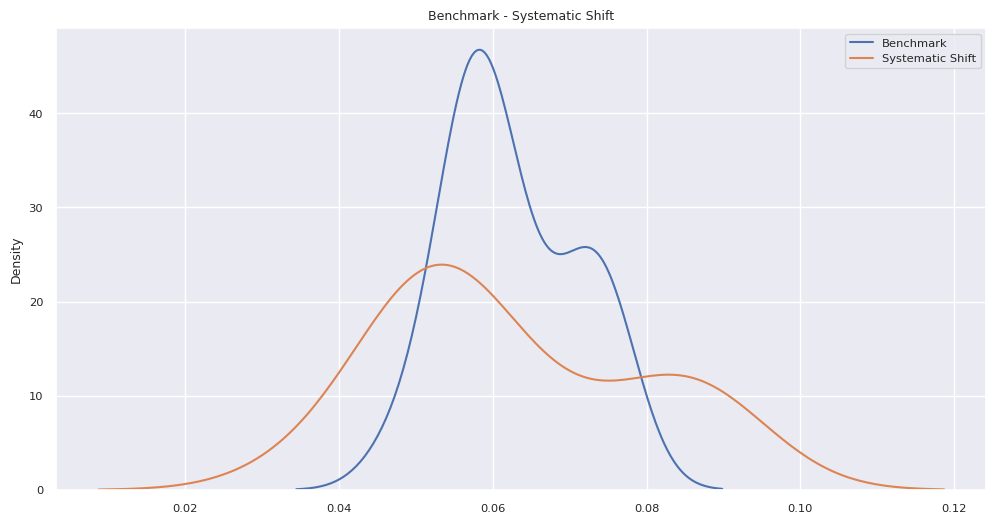

In [11]:
#KL-Divergence for Data with Systematic Shift

test_6_w_syst_shift = benchmark_data.copy()

test_6_w_syst_shift= 2 * test_6_w_syst_shift

test_6_w_syst_shift_probability = softmax(test_6_w_syst_shift)

kl_div_data['Data with Systematic Shift - [Test6]']  = np.round(kl_div(benchmark_probability,test_6_w_syst_shift_probability),3)



sns.kdeplot(benchmark_probability,label='Benchmark')
sns.kdeplot(test_6_w_syst_shift_probability,label='Systematic Shift')
plt.title('Benchmark - Systematic Shift')
plt.legend()
plt.savefig(os.path.join(file_path,"Test6_SystShift.png"))
plt.show()

In [12]:
kl_div_data.style.format("{:.2f}").applymap(colorCodes).to_latex('MonteCarloTable.tex')